In [68]:
from selenium import webdriver
driver = webdriver.Chrome('./chromedriver')

In [1]:
# 에브리타임 접속
loginUrl = 'https://everytime.kr/login'

driver.implicitly_wait(5)

driver.get(loginUrl)

# 로그인
username = 'hdohe0113'
userpw = input()

driver.find_element_by_xpath('//*[@id="container"]/form/p[1]/input').send_keys(username)
driver.find_element_by_xpath('//*[@id="container"]/form/p[2]/input').send_keys(userpw)

driver.implicitly_wait(5)

driver.find_element_by_xpath('//*[@id="container"]/form/p[3]/input').submit()

# 해당 단어 검색
word = '개강\n'
what_search = driver.find_element_by_xpath('//*[@id="container"]/div[3]/form/input')
what_search.send_keys(word)

total_posting_url = []

NameError: name 'driver' is not defined

In [70]:
# 그 페이지 포스팅 다 가져오기
def get_postings(driver, total_posting_url):
    posting = driver.find_elements_by_xpath('//*[@id="container"]/div[2]/article/a')
    posting_url = [page.get_attribute('href') for page in posting]
    total_posting_url += posting_url

In [71]:
# 다음 페이지
def get_next_page(driver):
    try:
        next_page = driver.find_element_by_xpath('//*[@id="container"]/div[2]/div[2]/a[3]')
        next_page.click()
    except:
        close_button = driver.find_element_by_xpath('//*[@id="sheet"]/ul/li[3]/a')
        close_button.click()
        get_next_page(driver)

In [72]:
# 처음 다음페이지 넘어가기
def first(driver):
    try:
        next_page = driver.find_element_by_xpath('//*[@id="container"]/div[2]/div[2]/a')
        next_page.click()
    except:
        close_button = driver.find_element_by_xpath('//*[@id="sheet"]/ul/li[3]/a')
        close_button.click()
        first(driver)

In [73]:
# 두번째 다음페이지 넘어가기
def second(driver):
    try:
        next_page = driver.find_element_by_xpath('//*[@id="container"]/div[2]/div[2]/a[2]')
        next_page.click()
    except:
        close_button = driver.find_element_by_xpath('//*[@id="sheet"]/ul/li[3]/a')
        close_button.click()
        second(driver)

In [74]:
# url 크롤링
import time
from tqdm import tqdm


get_postings(driver, total_posting_url)
time.sleep(1)
first(driver)
time.sleep(1)

get_postings(driver, total_posting_url)
time.sleep(1)
second(driver)
time.sleep(1)

for _ in tqdm(range(150)):
    get_postings(driver, total_posting_url)
    time.sleep(1)
    get_next_page(driver)
    time.sleep(1)
len(total_posting_url)



  0%|                                                                                          | 0/150 [00:00<?, ?it/s]

  1%|▌                                                                                 | 1/150 [00:02<05:30,  2.22s/it]

  1%|█                                                                                 | 2/150 [00:04<05:26,  2.21s/it]

  2%|█▋                                                                                | 3/150 [00:06<05:23,  2.20s/it]

  3%|██▏                                                                               | 4/150 [00:08<05:20,  2.20s/it]

  3%|██▋                                                                               | 5/150 [00:10<05:18,  2.20s/it]

  4%|███▎                                                                              | 6/150 [00:13<05:18,  2.21s/it]

  5%|███▊                                                                              | 7/150 [00:15<05:15,  2.20s/it]

  5%|████▎                    

 85%|████████████████████████████████████████████████████████████████████▎           | 128/150 [04:40<00:48,  2.20s/it]

 86%|████████████████████████████████████████████████████████████████████▊           | 129/150 [04:43<00:46,  2.20s/it]

 87%|█████████████████████████████████████████████████████████████████████▎          | 130/150 [04:45<00:43,  2.20s/it]

 87%|█████████████████████████████████████████████████████████████████████▊          | 131/150 [04:47<00:41,  2.20s/it]

 88%|██████████████████████████████████████████████████████████████████████▍         | 132/150 [04:49<00:39,  2.20s/it]

 89%|██████████████████████████████████████████████████████████████████████▉         | 133/150 [04:51<00:37,  2.19s/it]

 89%|███████████████████████████████████████████████████████████████████████▍        | 134/150 [04:54<00:35,  2.19s/it]

 90%|████████████████████████████████████████████████████████████████████████        | 135/150 [04:56<00:32,  2.19s/it]

 91%|███████████████████████████

3040

In [75]:
len(total_posting_url), len(set(total_posting_url))

(3040, 3040)

In [76]:
def ele_to_text(url):
    driver.get(url)
    
    date = driver.find_element_by_xpath('//*[@id="container"]/div[2]/article/a/div/time')
    title = driver.find_element_by_xpath('//*[@id="container"]/div[1]/h1')
    body = driver.find_element_by_xpath('//*[@id="container"]/div[2]/article/a/p')
    comments = driver.find_elements_by_xpath('//*[@id="container"]/div[2]/article/div/article')
    n = len(comments)
    comment_list = [driver.find_element_by_xpath(f'//*[@id="container"]/div[2]/article/div/article[{i}]/p') for i in range(1, n+1)]
    comment_list = [j.text for j in comment_list]
    return {
        'date': date.text,
        'title': title.text,
        'body': body.text,
        'comments': comment_list
    }

In [77]:
from tqdm import tqdm

data = []

for i in tqdm(range(len(total_posting_url))):
    d = ele_to_text(total_posting_url[i])
    data.append(d)
    time.sleep(2)



  0%|                                                                                         | 0/3040 [00:00<?, ?it/s]

  0%|                                                                               | 1/3040 [00:07<6:21:49,  7.54s/it]

  0%|                                                                               | 2/3040 [00:10<5:07:32,  6.07s/it]

  0%|                                                                               | 3/3040 [00:17<5:27:50,  6.48s/it]

  0%|                                                                               | 4/3040 [00:20<4:26:22,  5.26s/it]

  0%|▏                                                                              | 5/3040 [00:22<3:50:23,  4.55s/it]

  0%|▏                                                                              | 6/3040 [00:25<3:18:02,  3.92s/it]

  0%|▏                                                                              | 7/3040 [00:27<2:54:20,  3.45s/it]

  0%|▏                        

  4%|███▏                                                                         | 128/3040 [06:42<3:40:38,  4.55s/it]

  4%|███▎                                                                         | 129/3040 [06:45<3:13:01,  3.98s/it]

  4%|███▎                                                                         | 130/3040 [06:47<2:52:38,  3.56s/it]

  4%|███▎                                                                         | 131/3040 [06:50<2:39:32,  3.29s/it]

  4%|███▎                                                                         | 132/3040 [06:52<2:28:51,  3.07s/it]

  4%|███▎                                                                         | 133/3040 [06:55<2:23:29,  2.96s/it]

  4%|███▍                                                                         | 134/3040 [06:58<2:19:40,  2.88s/it]

  4%|███▍                                                                         | 135/3040 [07:00<2:12:52,  2.74s/it]

  4%|███▍                       

  8%|██████▍                                                                      | 256/3040 [13:16<2:27:23,  3.18s/it]

  8%|██████▌                                                                      | 257/3040 [13:24<3:25:41,  4.43s/it]

  8%|██████▌                                                                      | 258/3040 [13:31<4:06:13,  5.31s/it]

  9%|██████▌                                                                      | 259/3040 [13:33<3:24:54,  4.42s/it]

  9%|██████▌                                                                      | 260/3040 [13:36<2:58:17,  3.85s/it]

  9%|██████▌                                                                      | 261/3040 [13:38<2:39:46,  3.45s/it]

  9%|██████▋                                                                      | 262/3040 [13:46<3:34:39,  4.64s/it]

  9%|██████▋                                                                      | 263/3040 [13:48<3:04:34,  3.99s/it]

  9%|██████▋                    

 13%|█████████▋                                                                   | 384/3040 [21:33<3:20:55,  4.54s/it]

 13%|█████████▊                                                                   | 385/3040 [21:35<2:54:23,  3.94s/it]

 13%|█████████▊                                                                   | 386/3040 [21:38<2:35:20,  3.51s/it]

 13%|█████████▊                                                                   | 387/3040 [21:45<3:26:48,  4.68s/it]

 13%|█████████▊                                                                   | 388/3040 [21:48<3:06:00,  4.21s/it]

 13%|█████████▊                                                                   | 389/3040 [21:56<3:47:29,  5.15s/it]

 13%|█████████▉                                                                   | 390/3040 [21:58<3:12:05,  4.35s/it]

 13%|█████████▉                                                                   | 391/3040 [22:01<2:47:36,  3.80s/it]

 13%|█████████▉                 

 17%|████████████▉                                                                | 512/3040 [29:31<2:29:02,  3.54s/it]

 17%|████████████▉                                                                | 513/3040 [29:34<2:17:26,  3.26s/it]

 17%|█████████████                                                                | 514/3040 [29:36<2:08:08,  3.04s/it]

 17%|█████████████                                                                | 515/3040 [29:39<1:59:59,  2.85s/it]

 17%|█████████████                                                                | 516/3040 [29:46<2:57:35,  4.22s/it]

 17%|█████████████                                                                | 517/3040 [29:48<2:34:36,  3.68s/it]

 17%|█████████████                                                                | 518/3040 [29:51<2:18:23,  3.29s/it]

 17%|█████████████▏                                                               | 519/3040 [29:53<2:07:03,  3.02s/it]

 17%|█████████████▏             

 21%|████████████████▏                                                            | 640/3040 [36:37<2:18:29,  3.46s/it]

 21%|████████████████▏                                                            | 641/3040 [36:40<2:05:36,  3.14s/it]

 21%|████████████████▎                                                            | 642/3040 [36:42<1:55:55,  2.90s/it]

 21%|████████████████▎                                                            | 643/3040 [36:45<1:50:45,  2.77s/it]

 21%|████████████████▎                                                            | 644/3040 [36:47<1:48:02,  2.71s/it]

 21%|████████████████▎                                                            | 645/3040 [36:50<1:44:33,  2.62s/it]

 21%|████████████████▎                                                            | 646/3040 [36:52<1:42:25,  2.57s/it]

 21%|████████████████▍                                                            | 647/3040 [36:59<2:39:57,  4.01s/it]

 21%|████████████████▍          

 25%|███████████████████▍                                                         | 768/3040 [43:59<1:48:54,  2.88s/it]

 25%|███████████████████▍                                                         | 769/3040 [44:02<1:43:15,  2.73s/it]

 25%|███████████████████▌                                                         | 770/3040 [44:04<1:38:59,  2.62s/it]

 25%|███████████████████▌                                                         | 771/3040 [44:07<1:37:50,  2.59s/it]

 25%|███████████████████▌                                                         | 772/3040 [44:10<1:44:25,  2.76s/it]

 25%|███████████████████▌                                                         | 773/3040 [44:12<1:42:26,  2.71s/it]

 25%|███████████████████▌                                                         | 774/3040 [44:20<2:34:57,  4.10s/it]

 25%|███████████████████▋                                                         | 775/3040 [44:22<2:16:21,  3.61s/it]

 26%|███████████████████▋       

 29%|██████████████████████▋                                                      | 896/3040 [52:28<2:01:19,  3.40s/it]

 30%|██████████████████████▋                                                      | 897/3040 [52:30<1:53:02,  3.16s/it]

 30%|██████████████████████▋                                                      | 898/3040 [52:33<1:52:44,  3.16s/it]

 30%|██████████████████████▊                                                      | 899/3040 [52:36<1:43:26,  2.90s/it]

 30%|██████████████████████▊                                                      | 900/3040 [52:38<1:40:47,  2.83s/it]

 30%|██████████████████████▊                                                      | 901/3040 [52:41<1:36:44,  2.71s/it]

 30%|██████████████████████▊                                                      | 902/3040 [52:48<2:28:00,  4.15s/it]

 30%|██████████████████████▊                                                      | 903/3040 [52:51<2:09:25,  3.63s/it]

 30%|██████████████████████▉    

 34%|████████████████████████▉                                                 | 1024/3040 [1:00:50<1:35:00,  2.83s/it]

 34%|████████████████████████▉                                                 | 1025/3040 [1:00:53<1:34:24,  2.81s/it]

 34%|████████████████████████▉                                                 | 1026/3040 [1:00:55<1:29:23,  2.66s/it]

 34%|████████████████████████▉                                                 | 1027/3040 [1:00:58<1:30:00,  2.68s/it]

 34%|█████████████████████████                                                 | 1028/3040 [1:01:01<1:27:34,  2.61s/it]

 34%|█████████████████████████                                                 | 1029/3040 [1:01:03<1:28:28,  2.64s/it]

 34%|█████████████████████████                                                 | 1030/3040 [1:01:06<1:31:06,  2.72s/it]

 34%|█████████████████████████                                                 | 1031/3040 [1:01:09<1:31:20,  2.73s/it]

 34%|█████████████████████████  

 38%|████████████████████████████                                              | 1152/3040 [1:08:02<1:35:36,  3.04s/it]

 38%|████████████████████████████                                              | 1153/3040 [1:08:06<1:41:32,  3.23s/it]

 38%|████████████████████████████                                              | 1154/3040 [1:08:10<1:53:24,  3.61s/it]

 38%|████████████████████████████                                              | 1155/3040 [1:08:18<2:31:02,  4.81s/it]

 38%|████████████████████████████▏                                             | 1156/3040 [1:08:20<2:11:52,  4.20s/it]

 38%|████████████████████████████▏                                             | 1157/3040 [1:08:24<2:04:18,  3.96s/it]

 38%|████████████████████████████▏                                             | 1158/3040 [1:08:27<1:54:57,  3.66s/it]

 38%|████████████████████████████▏                                             | 1159/3040 [1:08:30<1:51:00,  3.54s/it]

 38%|███████████████████████████

 42%|███████████████████████████████▏                                          | 1280/3040 [1:17:24<1:56:48,  3.98s/it]

 42%|███████████████████████████████▏                                          | 1281/3040 [1:17:29<2:03:05,  4.20s/it]

 42%|███████████████████████████████▏                                          | 1282/3040 [1:17:32<1:54:22,  3.90s/it]

 42%|███████████████████████████████▏                                          | 1283/3040 [1:17:38<2:06:24,  4.32s/it]

 42%|███████████████████████████████▎                                          | 1284/3040 [1:17:45<2:34:55,  5.29s/it]

 42%|███████████████████████████████▎                                          | 1285/3040 [1:17:52<2:46:05,  5.68s/it]

 42%|███████████████████████████████▎                                          | 1286/3040 [1:17:55<2:20:53,  4.82s/it]

 42%|███████████████████████████████▎                                          | 1287/3040 [1:18:01<2:32:35,  5.22s/it]

 42%|███████████████████████████

 46%|██████████████████████████████████▎                                       | 1408/3040 [1:34:38<3:50:18,  8.47s/it]

 46%|██████████████████████████████████▎                                       | 1409/3040 [1:34:46<3:45:32,  8.30s/it]

 46%|██████████████████████████████████▎                                       | 1410/3040 [1:34:55<3:44:35,  8.27s/it]

 46%|██████████████████████████████████▎                                       | 1411/3040 [1:35:03<3:49:39,  8.46s/it]

 46%|██████████████████████████████████▎                                       | 1412/3040 [1:35:11<3:41:32,  8.16s/it]

 46%|██████████████████████████████████▍                                       | 1413/3040 [1:35:18<3:34:13,  7.90s/it]

 47%|██████████████████████████████████▍                                       | 1414/3040 [1:35:26<3:31:10,  7.79s/it]

 47%|██████████████████████████████████▍                                       | 1415/3040 [1:35:33<3:27:44,  7.67s/it]

 47%|███████████████████████████

 51%|█████████████████████████████████████▍                                    | 1536/3040 [1:54:22<3:45:15,  8.99s/it]

 51%|█████████████████████████████████████▍                                    | 1537/3040 [1:54:31<3:46:54,  9.06s/it]

 51%|█████████████████████████████████████▍                                    | 1538/3040 [1:54:46<4:32:44, 10.90s/it]

 51%|█████████████████████████████████████▍                                    | 1539/3040 [1:55:04<5:22:39, 12.90s/it]

 51%|█████████████████████████████████████▍                                    | 1540/3040 [1:55:16<5:15:30, 12.62s/it]

 51%|█████████████████████████████████████▌                                    | 1541/3040 [1:55:24<4:40:33, 11.23s/it]

 51%|█████████████████████████████████████▌                                    | 1542/3040 [1:55:35<4:39:02, 11.18s/it]

 51%|█████████████████████████████████████▌                                    | 1543/3040 [1:55:49<4:59:06, 11.99s/it]

 51%|███████████████████████████

 55%|████████████████████████████████████████▌                                 | 1664/3040 [2:08:40<1:38:29,  4.29s/it]

 55%|████████████████████████████████████████▌                                 | 1665/3040 [2:08:43<1:28:41,  3.87s/it]

 55%|████████████████████████████████████████▌                                 | 1666/3040 [2:08:46<1:21:33,  3.56s/it]

 55%|████████████████████████████████████████▌                                 | 1667/3040 [2:08:49<1:15:12,  3.29s/it]

 55%|████████████████████████████████████████▌                                 | 1668/3040 [2:08:51<1:10:54,  3.10s/it]

 55%|████████████████████████████████████████▋                                 | 1669/3040 [2:08:54<1:07:39,  2.96s/it]

 55%|████████████████████████████████████████▋                                 | 1670/3040 [2:08:57<1:10:06,  3.07s/it]

 55%|████████████████████████████████████████▋                                 | 1671/3040 [2:09:05<1:41:19,  4.44s/it]

 55%|███████████████████████████

 59%|███████████████████████████████████████████▌                              | 1792/3040 [2:16:13<1:29:03,  4.28s/it]

 59%|███████████████████████████████████████████▋                              | 1793/3040 [2:16:16<1:20:09,  3.86s/it]

 59%|███████████████████████████████████████████▋                              | 1794/3040 [2:16:18<1:13:11,  3.52s/it]

 59%|███████████████████████████████████████████▋                              | 1795/3040 [2:16:21<1:07:33,  3.26s/it]

 59%|███████████████████████████████████████████▋                              | 1796/3040 [2:16:24<1:06:12,  3.19s/it]

 59%|███████████████████████████████████████████▋                              | 1797/3040 [2:16:27<1:03:48,  3.08s/it]

 59%|███████████████████████████████████████████▊                              | 1798/3040 [2:16:34<1:31:27,  4.42s/it]

 59%|███████████████████████████████████████████▊                              | 1799/3040 [2:16:39<1:34:54,  4.59s/it]

 59%|███████████████████████████

 63%|████████████████████████████████████████████████                            | 1920/3040 [2:23:39<48:55,  2.62s/it]

 63%|████████████████████████████████████████████████                            | 1921/3040 [2:23:42<48:01,  2.58s/it]

 63%|████████████████████████████████████████████████                            | 1922/3040 [2:23:44<48:29,  2.60s/it]

 63%|████████████████████████████████████████████████                            | 1923/3040 [2:23:47<46:57,  2.52s/it]

 63%|████████████████████████████████████████████████                            | 1924/3040 [2:23:49<45:56,  2.47s/it]

 63%|████████████████████████████████████████████████▏                           | 1925/3040 [2:23:51<45:13,  2.43s/it]

 63%|████████████████████████████████████████████████▏                           | 1926/3040 [2:23:54<46:13,  2.49s/it]

 63%|████████████████████████████████████████████████▏                           | 1927/3040 [2:23:56<45:54,  2.47s/it]

 63%|███████████████████████████

 67%|█████████████████████████████████████████████████▊                        | 2048/3040 [2:30:01<1:04:20,  3.89s/it]

 67%|█████████████████████████████████████████████████▉                        | 2049/3040 [2:30:09<1:21:20,  4.92s/it]

 67%|█████████████████████████████████████████████████▉                        | 2050/3040 [2:30:11<1:10:03,  4.25s/it]

 67%|█████████████████████████████████████████████████▉                        | 2051/3040 [2:30:14<1:00:38,  3.68s/it]

 68%|███████████████████████████████████████████████████▎                        | 2052/3040 [2:30:16<54:14,  3.29s/it]

 68%|███████████████████████████████████████████████████▎                        | 2053/3040 [2:30:18<49:29,  3.01s/it]

 68%|█████████████████████████████████████████████████▉                        | 2054/3040 [2:30:26<1:10:45,  4.31s/it]

 68%|██████████████████████████████████████████████████                        | 2055/3040 [2:30:28<1:01:48,  3.76s/it]

 68%|███████████████████████████

 72%|██████████████████████████████████████████████████████▍                     | 2176/3040 [2:36:33<55:06,  3.83s/it]

 72%|██████████████████████████████████████████████████████▍                     | 2177/3040 [2:36:36<49:12,  3.42s/it]

 72%|██████████████████████████████████████████████████████▍                     | 2178/3040 [2:36:39<48:44,  3.39s/it]

 72%|██████████████████████████████████████████████████████▍                     | 2179/3040 [2:36:41<44:24,  3.09s/it]

 72%|█████████████████████████████████████████████████████                     | 2180/3040 [2:36:49<1:02:41,  4.37s/it]

 72%|██████████████████████████████████████████████████████▌                     | 2181/3040 [2:36:51<53:58,  3.77s/it]

 72%|██████████████████████████████████████████████████████▌                     | 2182/3040 [2:36:54<48:29,  3.39s/it]

 72%|██████████████████████████████████████████████████████▌                     | 2183/3040 [2:36:56<44:23,  3.11s/it]

 72%|███████████████████████████

WebDriverException: Message: chrome not reachable
  (Session info: chrome=83.0.4103.97)


In [78]:
len(data)

2257

In [84]:
import pandas as pd
df = pd.DataFrame(data)
# df.to_csv('everytime_개강2.csv')
df.head()

,date,title,body,comments
0,06/06 00:40,브로리에게 물어봐,브로리님 계절학기 녹화강의인지 실시간인지는 개강해야 알 수 있나요?,[]
1,06/05 23:46,자과캠 자유게시판,맨날 10시간씩은 공부하는거 같은데(강의듣는시간 주말포함)\n\n왜 이렇게 모르는게...,"[......ㄷㄷ, 고시준비함?, 나도임..몇학년 몇과목이야?, 3학년 복학생임....."
2,06/05 20:28,인사캠 자유게시판,새내기인데 그냥 개강 안해도 서울 올라가서 토익학원이나 다녀보려하는데\n\n보통 어...,[]
3,06/05 09:42,인사캠 자유게시판,2학기 개강은 보통 언제 하나요?,"[8월말 - 9월이용, 감사합니다~]"
4,06/04 22:41,홍보게시판,한국외국어대학교 외국어연수평가원에서는 여름방학 외국어특별과정 수강생을 모집합니다.\...,"[우와..가격.., 듣고 싶은데 너무 비싸요우..., 개비싸다... 85만 원......"


In [85]:
df.tail()

,date,title,body,comments
2252,01/18 02:50,브로리에게 물어봐,브로리님!\n\n추가학기를 하지않는다면 학점포기할 수 있는 마지막 기간은 결국 8학...,"[네, 감사합니다!]"
2253,01/18 00:55,자과캠 자유게시판,타의대 친구중 하나는 담주 개강하던데,"[개빡세넹;, 학년마다 다름]"
2254,01/16 21:33,인사캠 자유게시판,개강하고 이런몸 보면 난줄알아라,"[ㅈㄴ싫다, 직.접.말.해, 존.나.싫.다, ㅋㅋㅋㅋㅋㅋㅋ와 진짜 망상속에 사네, ..."
2255,01/16 16:39,인사캠 자유게시판,몇월에 개강하나요?,[학교마다 달라요 수학보고서에 나와있으니 참고하시면 좋을거같아요]
2256,01/16 10:13,자과캠 자유게시판,형누나들 도와주세요ㅠㅠ\n지금 국제품만 남고 이미 일다니고 있는 영어쓰레기입니다\n...,"[제발 오픽하세요, 왜오픽추천하시나요ㅠㅠ 기회가한번뿐일것같아서 오픽하면.., 하루만..."


In [14]:
import pandas as pd

In [15]:
corona = pd.read_csv('./Corona2.csv')
corona.tail()

,날짜,치료중,누적확진,누적사망,누적격리해제
131,2020-05-31,793,"11,468",270,"10,405"
132,2020-06-01,810,"11,503",271,"10,422"
133,2020-06-02,823,"11,541",272,"10,446"
134,2020-06-03,850,"11,590",273,"10,467"
135,2020-06-04,857,"11,629",273,"10,499"


In [16]:
corona.누적확진.values

array(['1', '1', '1', '2', '2', '2', '4', '4', '4', '7', '11', '12', '15',
       '15', '16', '21', '24', '24', '24', '27', '27', '28', '28', '28',
       '28', '28', '29', '30', '39', '46', '104', '204', '433', '608',
       '843', '977', '1,261', '1,766', '2,337', '3,150', '3,736', '4,212',
       '4,812', '5,328', '5,766', '6,284', '6,767', '7,134', '7,382',
       '7,513', '7,755', '7,869', '7,979', '8,086', '8,162', '8,236',
       '8,320', '8,413', '8,565', '8,652', '8,799', '8,897', '8,961',
       '9,037', '9,137', '9,241', '9,332', '9,478', '9,583', '9,661',
       '9,786', '9,887', '9,976', '10,062', '10,156', '10,237', '10,284',
       '10,331', '10,384', '10,423', '10,450', '10,480', '10,512',
       '10,537', '10,564', '10,591', '10,613', '10,635', '10,653',
       '10,661', '10,674', '10,683', '10,694', '10,702', '10,708',
       '10,718', '10,728', '10,738', '10,752', '10,761', '10,765',
       '10,774', '10,780', '10,793', '10,801', '10,804', '10,806',
       '10,810', 

In [17]:
corona.날짜.values.size, corona.날짜.values 

(136,
 array(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
        '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
        '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
        '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
        '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
        '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
        '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
        '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
        '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
        '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
        '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
        '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
        '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
        '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
        '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
        '2020-03-21', '2020-03-22'

In [18]:
date = [corona.날짜.values[i] for i in range(0, 136, 5)]
date = [i[5:] for i in date]
print(len(date))
date

28


['01-21',
 '01-26',
 '01-31',
 '02-05',
 '02-10',
 '02-15',
 '02-20',
 '02-25',
 '03-01',
 '03-06',
 '03-11',
 '03-16',
 '03-21',
 '03-26',
 '03-31',
 '04-05',
 '04-10',
 '04-15',
 '04-20',
 '04-25',
 '04-30',
 '05-05',
 '05-10',
 '05-15',
 '05-20',
 '05-25',
 '05-30',
 '06-04']

In [19]:
infected = [corona.누적확진.values[i] for i in range(0, 136, 5)]
print(len(infected))
infected

28


['1',
 '2',
 '11',
 '21',
 '27',
 '28',
 '104',
 '977',
 '3,736',
 '6,284',
 '7,755',
 '8,236',
 '8,799',
 '9,241',
 '9,786',
 '10,237',
 '10,450',
 '10,591',
 '10,674',
 '10,718',
 '10,765',
 '10,804',
 '10,874',
 '11,018',
 '11,110',
 '11,206',
 '11,441',
 '11,629']

In [20]:
infected_int = []
for i in infected:
    if ',' in i:
        i = i.replace(',','')
    infected_int.append(int(i))
infected_int

[1,
 2,
 11,
 21,
 27,
 28,
 104,
 977,
 3736,
 6284,
 7755,
 8236,
 8799,
 9241,
 9786,
 10237,
 10450,
 10591,
 10674,
 10718,
 10765,
 10804,
 10874,
 11018,
 11110,
 11206,
 11441,
 11629]

In [21]:
corona.치료중.values
chi = [corona.치료중.values[i] for i in range(0, 136, 5)]
chi_int = []
for i in chi:
    if ',' in i:
        i = i.replace(',','')
    chi_int.append(int(i))
chi_int

[1,
 2,
 11,
 20,
 23,
 19,
 87,
 945,
 3688,
 6132,
 7407,
 7024,
 6085,
 4966,
 4216,
 3591,
 3125,
 2750,
 2324,
 1843,
 1459,
 1267,
 1008,
 937,
 781,
 713,
 774,
 857]

In [22]:
corona.누적격리해제.values
hae = [corona.누적격리해제.values[i] for i in range(0, 136, 5)]
hae_int = []
for i in hae:
    if ',' in i:
        i = i.replace(',','')
    hae_int.append(int(i))
hae_int

[0,
 0,
 0,
 1,
 4,
 9,
 16,
 22,
 30,
 108,
 288,
 1137,
 2612,
 4144,
 5408,
 6463,
 7117,
 7616,
 8114,
 8635,
 9059,
 9283,
 9610,
 9821,
 10066,
 10226,
 10398,
 10499]

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

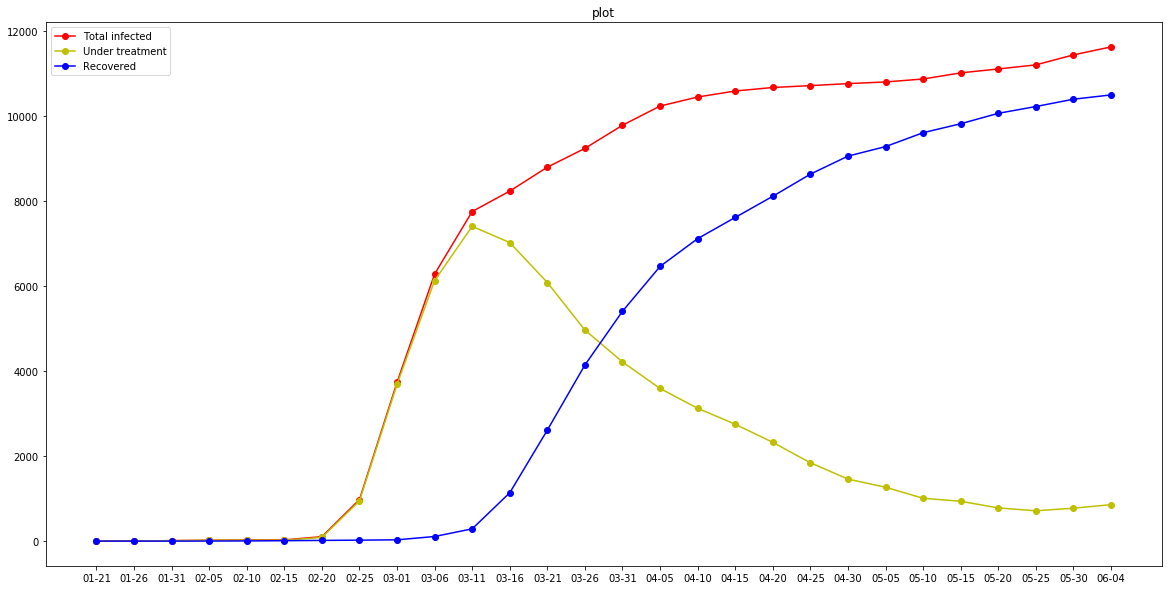

In [26]:
plt.figure(figsize=(20, 10))
plt.title("plot")
plt.plot(date, infected_int, 'ro-', label = 'Total infected')
plt.plot(date, chi_int, 'yo-', label = 'Under treatment')
plt.plot(date, hae_int, 'bo-', label = 'Recovered')
plt.legend(loc = 2)
plt.show()